# Chi-Square for the goodness of fit
The chi-square statistic measures how much the observed data differ from the expected data. The formula for the statistic is
$$\chi^2=\sum_{k=1}^n \frac{O_k-E_k}{E_k}$$
The degrees of freedom are $n − 1$, and p-value is computed from the chi-square distribution. Closer is the p-value to 1 better the fit is.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

## Load samples from model 1 and 2

In [2]:
df = pd.read_csv('Samples_from_2_Models.csv')
df.head()

,s1,s2
0,13.760310,17.878734
1,1.003570,0.342890
2,2.451739,9.668485
3,2.913641,22.177354
4,17.897487,5.282217


## Descriptive statistics

In [3]:
df.describe()

,s1,s2
count,1000000.000000,1000000.000000
mean,9.993421,9.994853
std,9.988073,9.985714
min,0.000002,0.000015
25%,2.877571,2.876593
50%,6.926414,6.930854
75%,13.845913,13.874968
max,125.724288,171.176415


## PDF values

In [4]:
PDF_1, x1, C1 = plt.hist(df['s1'], range = [0,100], bins = 20, normed = True)
PDF_2, x2, C2 = plt.hist(df['s2'], range = [0,100], bins = 20, normed = True)

In [5]:
PDF_1

array([  7.86814325e-02,   4.77441188e-02,   2.90214448e-02,
         1.75100304e-02,   1.06943850e-02,   6.42363125e-03,
         3.91694101e-03,   2.36768524e-03,   1.45085223e-03,
         8.45630443e-04,   5.39219412e-04,   3.16211384e-04,
         1.94607006e-04,   1.19404299e-04,   7.38026569e-05,
         4.22015193e-05,   2.78010008e-05,   1.80006480e-05,
         7.00025201e-06,   5.60020161e-06])

In [6]:
PDF_1.shape

(20,)

In [7]:
x1

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.])

In [8]:
x1.shape

(21,)

In [9]:
x = np.linspace(2.5,97.5,20)
x

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5])

In [10]:
x.shape

(20,)

## Exponential fit

In [11]:
def f(x,a):
    return np.log((1.0/a)*np.exp(-x/a))

In [12]:
a, var_a = curve_fit(f, x, np.log(PDF_1), p0=[10])

In [13]:
a 

array([ 9.976424])

In [14]:
var_a

array([[ 0.00133118]])

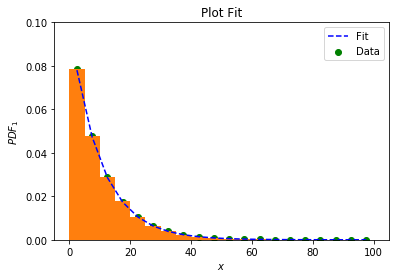

In [15]:
plt.scatter(x, PDF_1, label = 'Data', marker='o', color='g')
plt.plot(x, np.exp(f(x, *a)),label = 'Fit',linestyle='--', color='b')
plt.title('Plot Fit')
plt.xlabel('$x$')
plt.ylabel('$PDF_1$')
#plt.yscale('log')
plt.ylim([0,0.1])
plt.legend()
plt.show()

## Chi-Square Test

In [16]:
N = df['s1'][df['s1']<=100].count()
dx = 5
O = PDF_1*N*dx
E = (np.exp(-(x-2.5)/a) - np.exp(-(x+2.5)/a))*N

In [17]:
chisq, p = chisquare(O, f_exp=E, ddof=1)

In [18]:
chisq

19.093759202460944

In [19]:
p

0.38607127869954183